# 0. Content

This script contains the procudures for the exploratory visual analysis, including:
+ correlation heatmap
+ scatterplot of the vairables with the strongest correlations 
+ pair plot of all the variables
+ categorical plot showing generosity vs happiness by happiness level

# 1. Importing Libraries and Data

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# checking matplot.lib vertion
matplotlib.__version__

'3.5.2'

In [3]:
# option to show plot without call them specifically 
%matplotlib inline

In [4]:
# creating main path
path = r'C:\Users\muffi\OneDrive\CareerFoundry\World Happiness Index Analysis 2023'

In [5]:
# importing merged df
df_all_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_years_cleaned.csv'))

# 2. Removing Space and Time Variables

Spatial and time series analysis will be conducted later. I will remove such variables for now

In [6]:
# looking for spatial and time series variables 
df_all_clean.columns

Index(['Unnamed: 0', 'location', 'rank', 'happiness_score', 'gdp_per_capita',
       'social_support', 'life_expectancy', 'freedom', 'trust_in_government',
       'generosity', 'year'],
      dtype='object')

In [7]:
# removing location, year, and old index 
# ts refers to time and space
df_all_no_ts = df_all_clean.drop(columns = ['location', 'year', 'Unnamed: 0'])

# 3. Correlation Heatmap

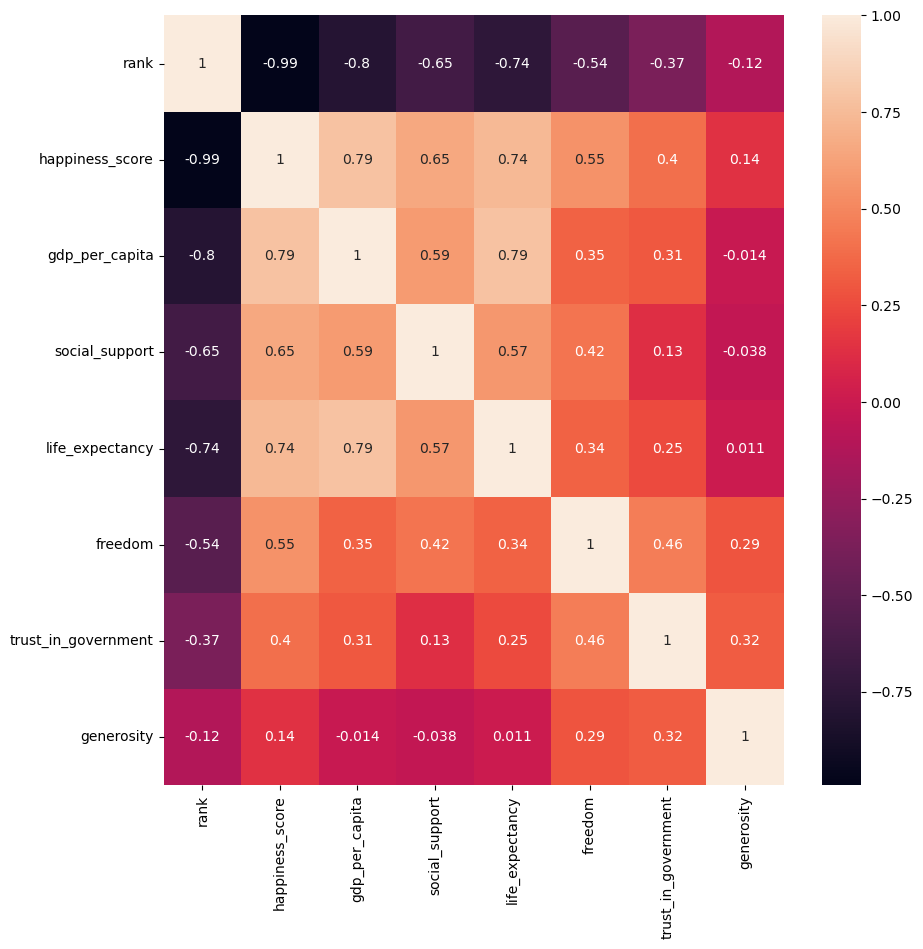

In [8]:
# creating subplot with matplotlib
corplot, ax = plt.subplots(figsize=(10,10))

# creating correlation heatmap 
corr_heatmap = sns.heatmap(df_all_no_ts.corr(), annot = True, ax=ax)

It is important to note, that the the subcategory (GDP, support, life expectancy, freedom, trust, and generosity) values represent the amount of influence the subcategory had on the happiness score. It does not represent the subcategories themseleves. In other words, a country with a hgh GDP per capita rating may have a low GDP, but are highly sensitive to the state of their economy. 

There is a strong correlation between happiness and sensitivity to GDP, life expectancy, social support and freedom. Generosity has nearly no influence on happiness, however. I wonder if generosity is a reliable subcategpry for happiness. None of the subcategories have inverse relationships, which surprises me. I would assume that some aspects would be antithetical (GDP and trusting the govenment for example - more money = less care about political corruption). In most cases, there is a weak correlation between subcategories. Rank is determined by happiness score, thus the very storng correlation.

In [9]:
#exporting visual
corr_heatmap.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_heatmap.png'))

# 4. Scatterplot

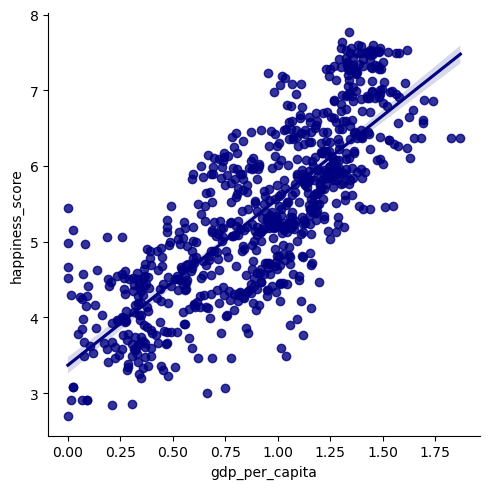

In [10]:
# scatterplot of happiness score and GDP per capita
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'gdp_per_capita', y = 'happiness_score', data = df_all_no_ts)

The most of the data points are close the the trend line. There are some instances in which the gdp has little to no relationshop with the happiness score. It would be interesting to investigate those points to see which countries those are and if there is any trackable reason for the divergence from the trend. 


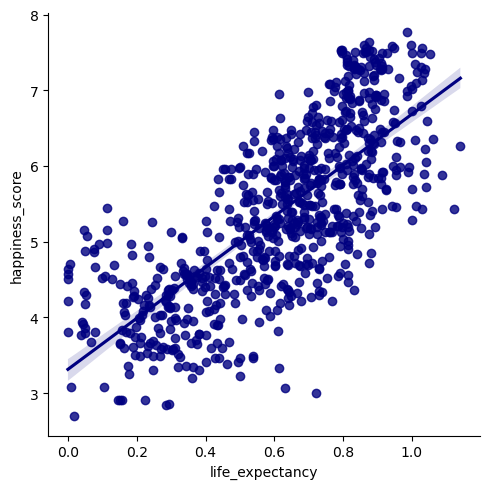

In [11]:
# scatterplot of happiness score and life expectancy
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'life_expectancy', y = 'happiness_score', data = df_all_no_ts)

The data is relatively close the line, but has a lot of variation when the happiness score is likes than 5.5. This could be because less happiness, means more issues, means more things inlfuencing the way one feels.

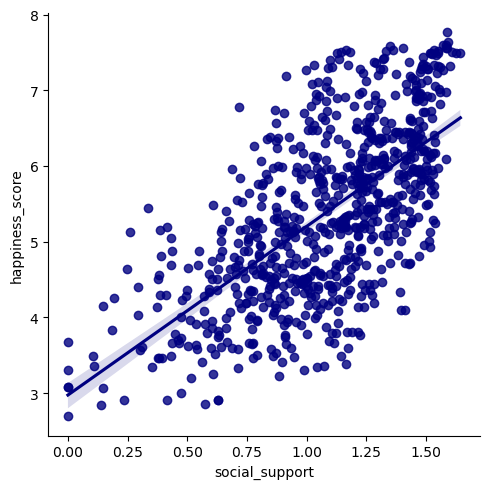

In [12]:
# scatterplot of happiness score and social support
flatui = ["navy", "mediumslateblue", "lavender"]
sns.set_palette(flatui)
sns.lmplot(x = 'social_support', y = 'happiness_score', data = df_all_no_ts)

According to this line, most of the social support influence scores are above 0.75. Looking at its descriptive statistics, it also has the highest average. This indicates that despite not having the the strong correlation with the happiness score, it is one of the most consistent influencing factors for it. 

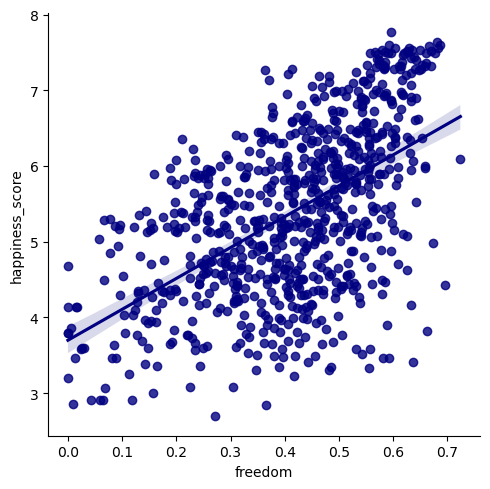

In [13]:
# scatterplot of happiness score and freedom
flatui = ["navy", "mediumslateblue", "lightsteelblue"]
sns.set_palette(flatui)
sns.lmplot(x = 'freedom', y = 'happiness_score', data = df_all_no_ts)

Freedom has quite a large spread with most of the variance occuring below the trend line. It would be interesting to see of there was a common trait that caused a country to fall above or below that line.

# 5. Pair Plot

In [14]:
df_all_small = df_all_no_ts.drop(columns = ['rank'])

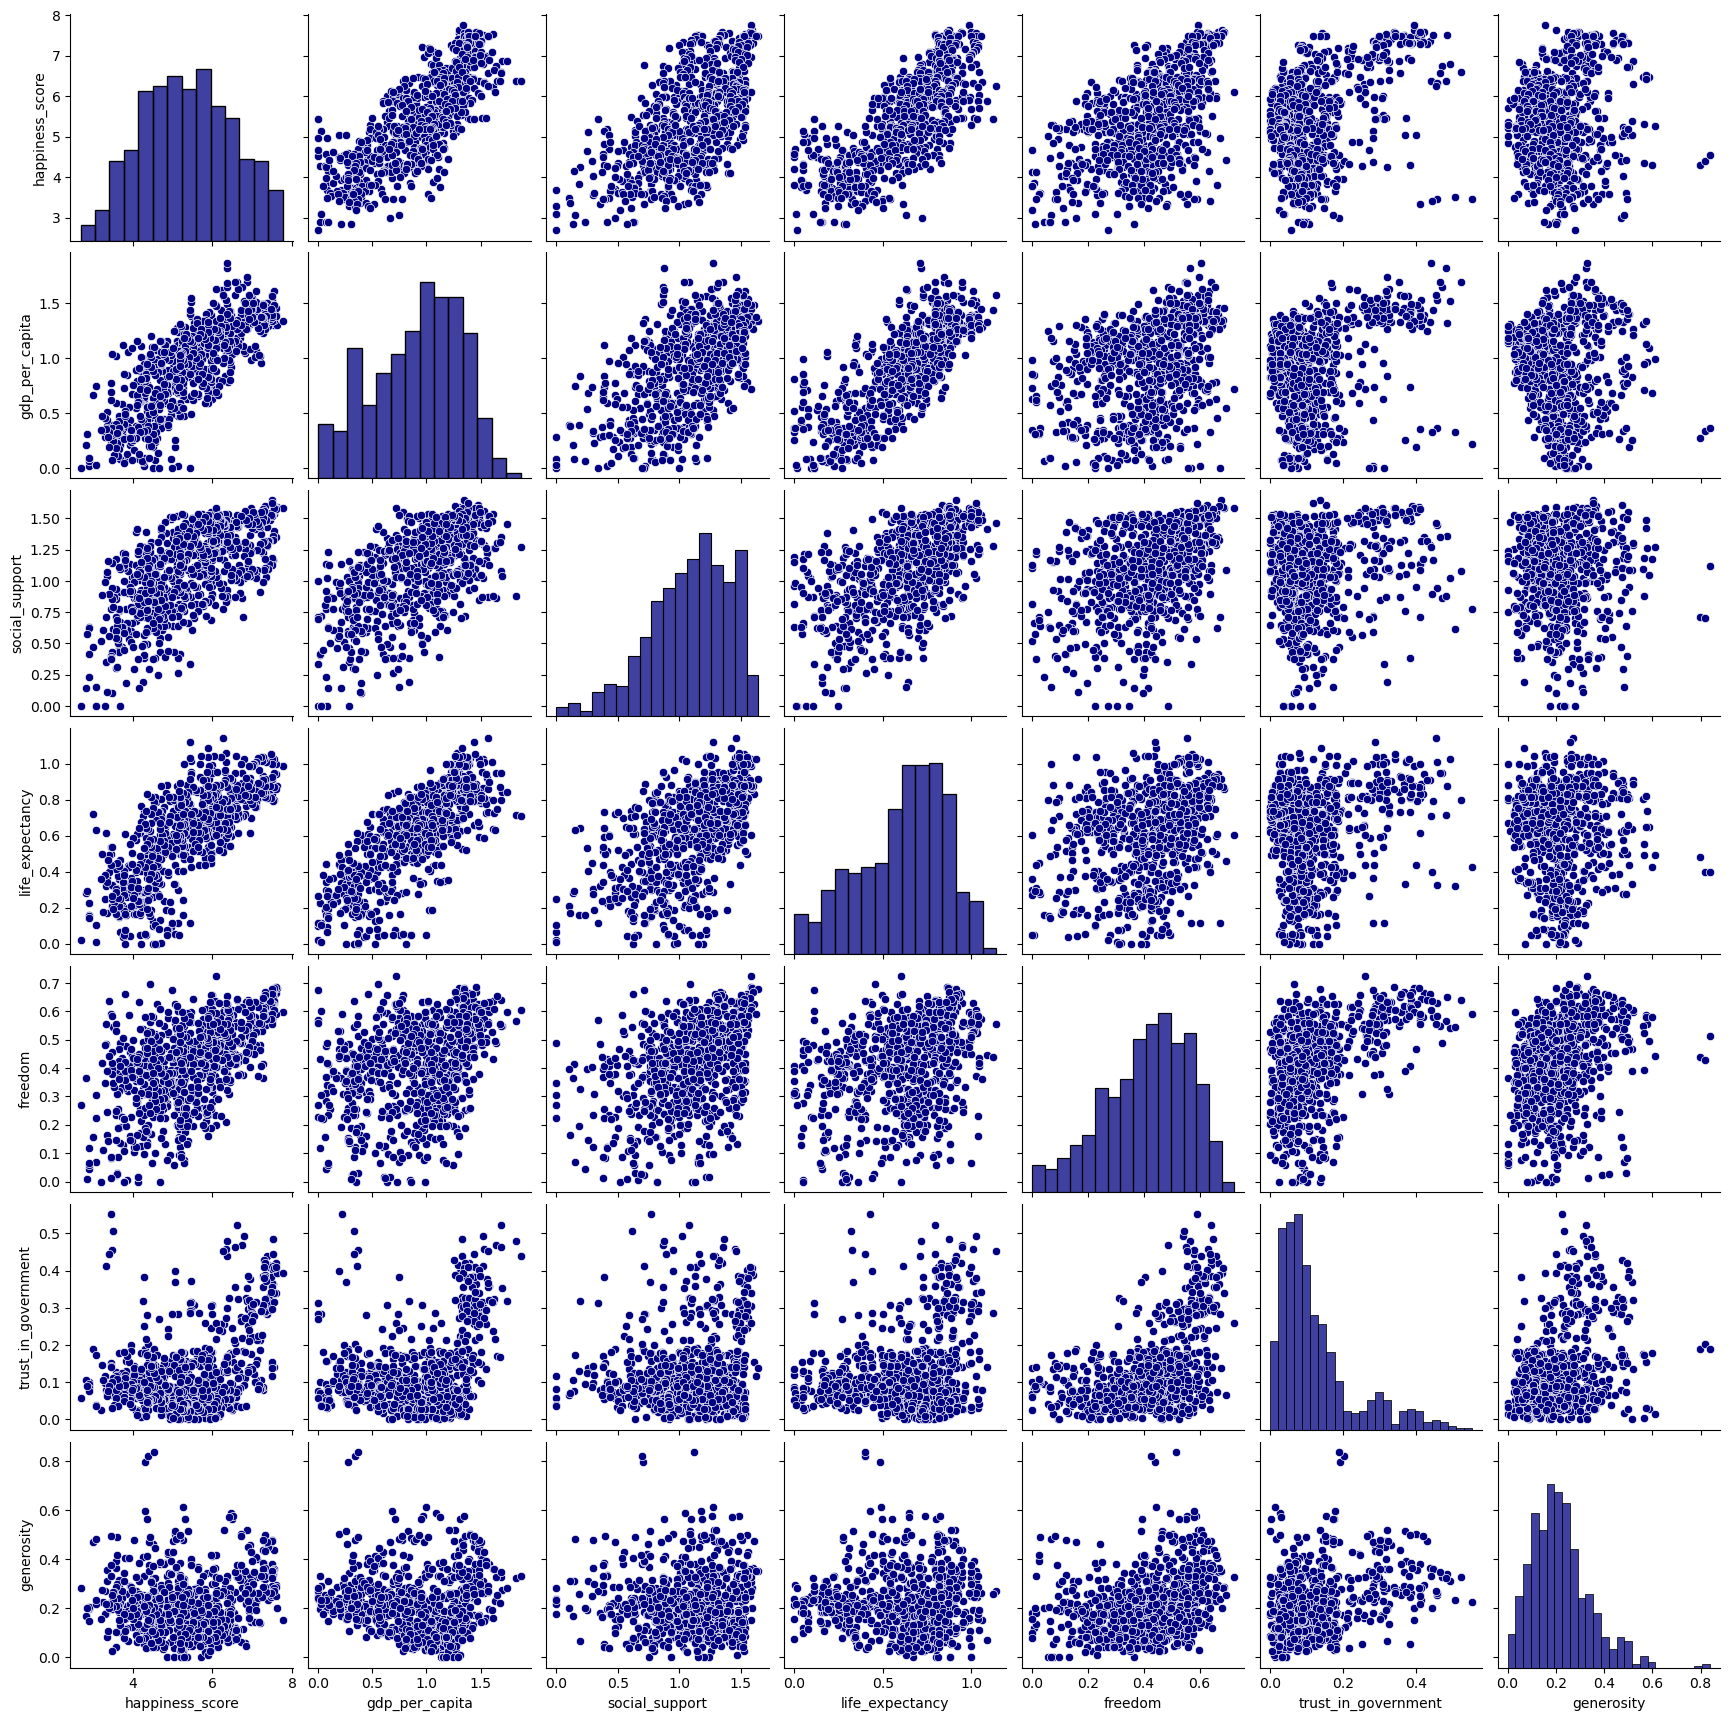

In [27]:
# creating a pair plot of all the variables
pair_plot = sns.pairplot(df_all_small)

Most of the government trust values fall belore 0.2, which is why there is little to no correlation between it and other variables. As a reult, the graph appears logarithmic (when trust on on the x-axis), rather than linear. Generosity is in a similar situation, with most of it values falling below 0.3. There appears to be 3 countries what differ drastically, however. It would be interesting to investigate what those those coutries and what causes them to be so heavily influenced by generousity for policay making reasons.

In [16]:
df_high_corr = df_all_no_ts[['happiness_score', 'gdp_per_capita', 'life_expectancy', 'social_support']]

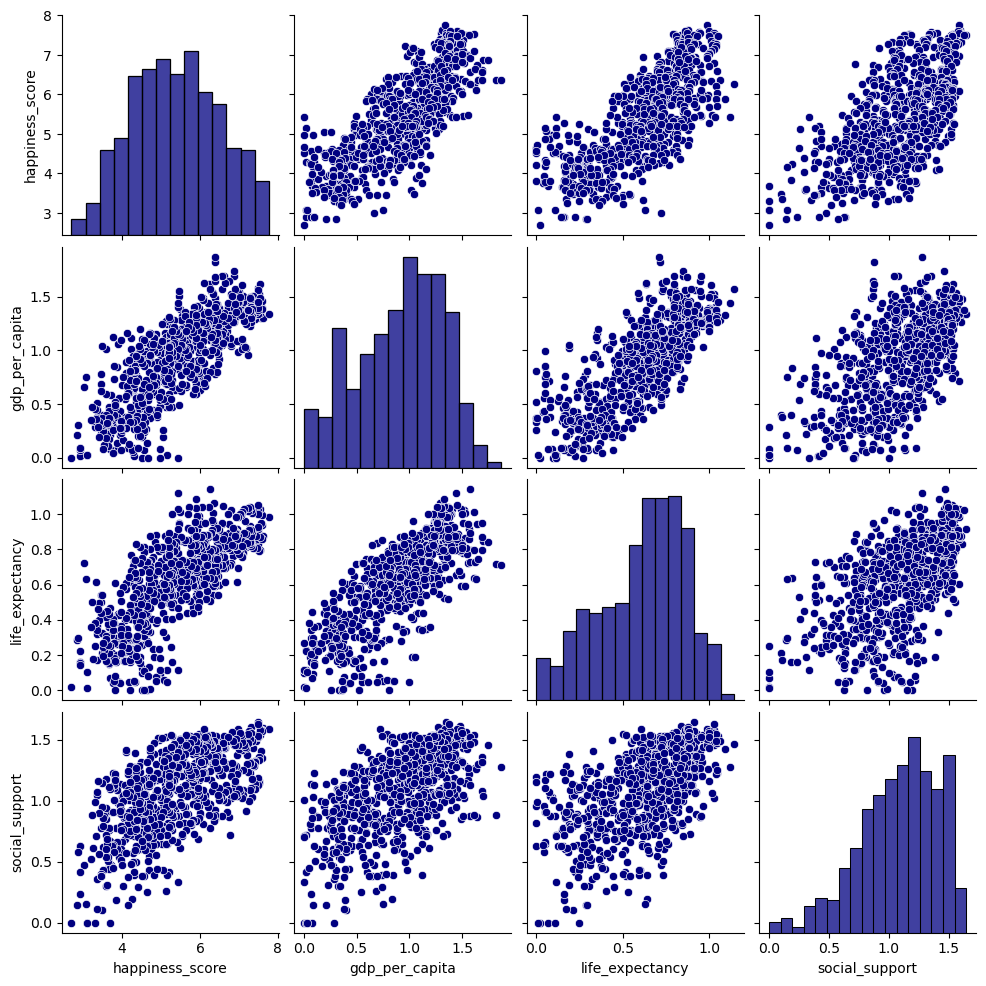

In [28]:
# creating a pair plot of the variables with the highest correlation
pair_plot_high_corr = sns.pairplot(df_high_corr)

In [29]:
# exporting high correlation pair plot
pair_plot_high_corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'high_correlation_pair_plot.png'))

# 6. Catrgorical Plot

I will cluster happiness according to the following values
+ High for values more than 1 standard deviation above the mean
+ Middle for values within 1 standard deviation of the mena
+ Low for values less 1 standard deviation below the mean

In [18]:
# happiness mean
happy_mean = df_all_no_ts['happiness_score'].mean()

In [19]:
# happiness standard deviation
happy_stdev = df_all_no_ts['happiness_score'].std()

In [20]:
# happiness threshold for high countries
high_thresh = happy_mean + happy_stdev

In [21]:
# happiness threshold for least low countries
low_thresh = happy_mean - happy_stdev

In [22]:
# indicating happiest countries
df_all_no_ts.loc[df_all_no_ts['happiness_score'] > high_thresh, 'happiness_level'] = 'High'

In [23]:
# indicating least happy happiness_score
df_all_no_ts.loc[df_all_no_ts['happiness_score'] < low_thresh, 'happiness_level'] = 'Low'

In [24]:
# indicating middle happy countries
df_all_no_ts.loc[(df_all_no_ts['happiness_score'] <= high_thresh) & (df_all_no_ts['happiness_score'] >= low_thresh), 'happiness_level'] = 'Middle'

In [25]:
# checking the 'happiness_level' entries
df_all_no_ts['happiness_level'].value_counts(dropna=False)

Middle    517
High      132
Low       132
Name: happiness_level, dtype: int64

<AxesSubplot:xlabel='generosity', ylabel='happiness_score'>

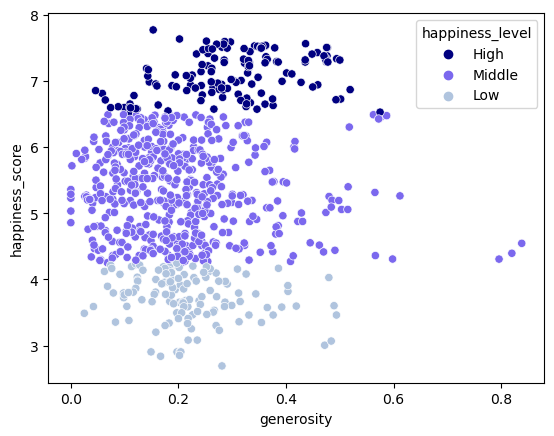

In [26]:
# creating a categorical scatterplot of the happiness vs generosity by GDP per capita
#sns.set(style='ticks')
flatui = ["navy", "mediumslateblue", "lightsteelblue"]
sns.set_palette(flatui)
sns.scatterplot(x = 'generosity', y = 'happiness_score', hue = 'happiness_level', data = df_all_no_ts)

The 3 outlier countries are still in the middle range of happiness, meaning that low happiness score are not in any way an indicator or sensitivity to generosity. 

# 7. New Questions

## 7.1. Answered Question

In there a trend in happines?
+ While futher investigation of this question is needed, it can be said that happiness is tied to hgih sensitivity to GDP per capital, social support, and life expectancy

## 7.2. New Questions

The following questions have been added to the investigation:
+ What causes outliers in each of the categories?
+ Are there common traits between countries that fall above and below the freedom v happiness trend line?

# Hypotheses

The following are hypotheses for later testing:
+ Countries with lower populations are more likely to be outlier than other countries.
+ Countries with hgiher life expecatancies are more likely to be sentive to it.
+ These sensitivities would make reliable predictability factors.
+ Countries with high GDP per capita are more likely to be sensitive to it.
+ Countries with higher GDP per capita are happier.